In [2]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [18]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow.
xlim = (-3,3)
ylim = (-3,3)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((308, 302), (154, 151), 0.02, ((-3.06, 3.06), (-3.0, 3.0)), 16)

In [19]:
cache = GridCache(g)
ψ = zeros_gridcurl(cache)
vel = zeros_gridgrad(cache);

In [20]:
zvort = ComplexF64[]
Γvort = Float64[]

Float64[]

In [21]:
push!(zvort,0.0+1.0im)
push!(Γvort,-5.0)

1-element Vector{Float64}:
 -5.0

In [22]:
push!(zvort,0.0-1.0im)
push!(Γvort,5.0)

2-element Vector{Float64}:
 -5.0
  5.0

In [23]:
v = Vortex.Point.(zvort,Γvort)

2-element Vector{PotentialFlow.Points.Point{Float64, Float64}}:
 Vortex.Point(0.0 + 1.0im, -5.0)
 Vortex.Point(0.0 - 1.0im, 5.0)

In [24]:
U∞ = 1.0  ## speed
α = 0.0 ## angle in radians
fs = Freestreams.Freestream(U∞*exp(im*α))

Freestream(1.0 + 0.0im)

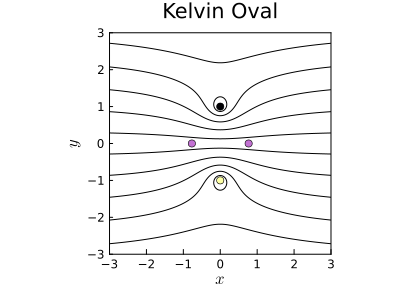

In [74]:
ψ .= ViscousFlow.streamfunction(fs,cache) + ViscousFlow.streamfunction(v,cache,angle=0)
p = plot(ψ,cache,color=:black,xlim=(-3,3),ylim=(-3,3),xlabel=L"x",ylabel=L"y",title="Kelvin Oval")
plot!(p,v) ## This adds markers for the vortices
scatter!(p,[-0.769, 0.769],[0,0],label="stagnation point")

In [71]:
system = (v,fs)
z_eval = 0.769+0.0*im
induce_velocity(z_eval,system,0.0)

-0.00011840865708889758 + 0.0im